Counts per pixel from Image: 33.0
Alpha:  <bound method AlphaModel.alpha of <Models.AlphaModel object at 0x00000280E7B58760>>
Rejection ratio:  0.26666666666666666
minimun of min_counts_over_n_counts 0.0023841988513961343


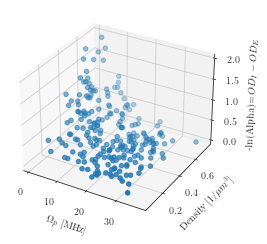

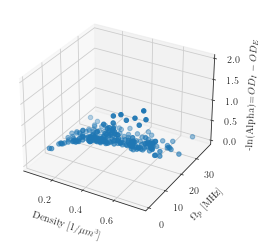

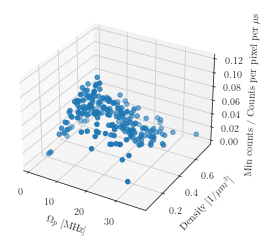

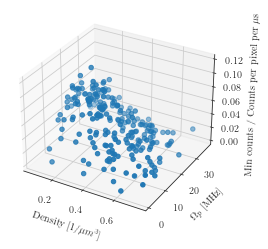

In [76]:
import pyfits
from scipy.ndimage import gaussian_filter
import scipy.optimize as opt
import numpy as np
import pylab as plt
import rydlab
import pandas as pd
import os
import copy
from lmfit import Model
from lmfit.models import LorentzianModel
from lmfit.models import ExponentialModel
from lmfit.models import ConstantModel
from lmfit import Parameters, minimize, report_fit, Model
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns
sns.set_style("dark")
sns.set_style("darkgrid")
import matplotlib as mpl
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import importlib


plt.rcParams.update({
  "text.usetex": True,

})

sns.set_style("white")



#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font',**{'family':'serif','serif':['Latin Modern Roman']})




#Parameters in MHz
Omega_p=1
Omega_c=6
Gamma_e=6.01
C_3=10000
C_6=300000


C_3=621
C_6=527


cross_section=0.78*0.78 #um^2
n_0=2.5*10**(-1) #1/um^3 = 10^12 1/cm^3 = 10^18 1/m^3
sigma_z=13 #um

N_i=1 #number of impuritíes
sigma_r=4 #read noise



#sys.path.insert(0, os.path.abspath('/home/qd/PycharmProjects/AlphaModel'))

import Models

importlib.reload(Models)

from Models import AlphaModel

importlib.reload(Models)
    
    
texp=1
counts=np.mean(33)
print("Counts per pixel from Image:", counts)

nbin=1

#Omega_p=2.392*np.sqrt(counts/texp)/nbin/(2*np.pi)
#Omega_c=3.9#/(2*np.pi)

Gamma_e=6.067
#C_3=414
#C_6=378
Q_E=0.44

#n_0=0.5*10**(-1) #1/um^3 = 10^12 1/cm^3 = 10^18 1/m^3
#sigma_z=32*np.sqrt(2)#um

N_i=1 #number of impuritíes
sigma_r=4 #read noise    
    

gamma_p=gamma_c=0.1
a=AlphaModel(Omega_p , Omega_c , gamma_p , gamma_c , Gamma_e ,Q_E, n_0 , sigma_z , sigma_r , texp, C_3 , C_6 , N_i)


print("Alpha: " ,a.alpha)

while a.step_count<500:
    a.walk()


#print("Omega_p:",a.Omega_p_list)
#print("Densities:",a.n_0_list)
#print("Alphas:",a.alpha_list)

    
print("Rejection ratio: ", a.rejection_ratio)

print("minimun of min_counts_over_n_counts", np.nanmin(a.min_counts_over_n_counts))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list, a.n_0_list, a.alpha_list)

ax.set_xlabel('$\Omega_p$ [MHz]')
ax.set_ylabel('Density $[1/\mu m^3]$')
ax.set_zlabel('-ln(Alpha)$=OD_I-OD_E$')

plt.show()    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.alpha_list)

ax.set_xlabel('Density $[1/\mu m^3]$')
ax.set_ylabel('$\Omega_p$ [MHz]')
ax.set_zlabel('-ln(Alpha)$=OD_I-OD_E$')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list,a.n_0_list,a.min_counts_over_n_counts,cmap='afmhot')


ax.set_xlabel('$\Omega_p$ [MHz]')
ax.set_ylabel('Density $[1/\mu m^3]$')
ax.set_zlabel('Min counts / Counts per pixel per $\mu$s')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.min_counts_over_n_counts,cmap='afmhot')

ax.set_xlabel('Density $[1/\mu m^3]$')
ax.set_ylabel('$\Omega_p$ [MHz]')
ax.set_zlabel('Min counts / Counts per pixel per $\mu$s')

plt.show()





#plt.plot(a.z_grid,a.f_bl(a.z_grid))


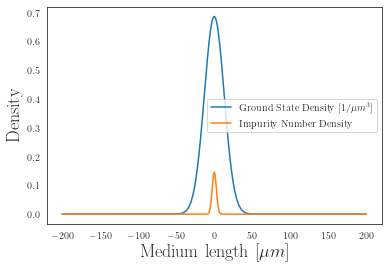

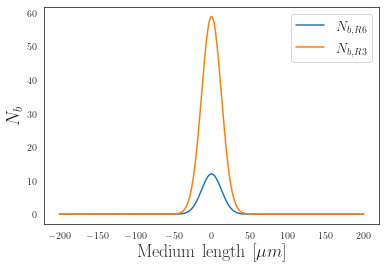

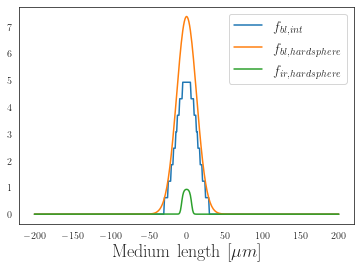

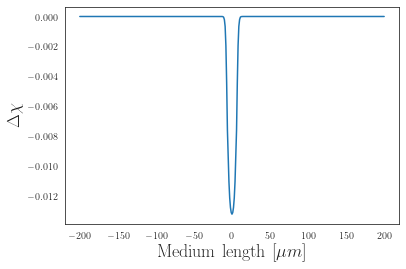

Alpha:  0.8526868463511778
Minimum Counts with Impurity:  164.42177404056918
Minimum Counts with EIT:  192.82785320796694


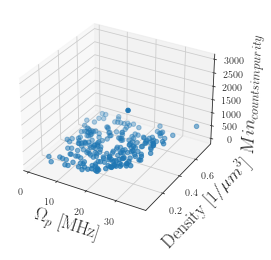

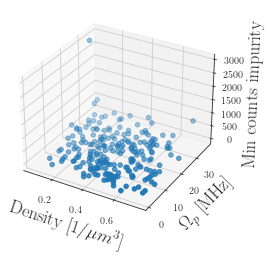

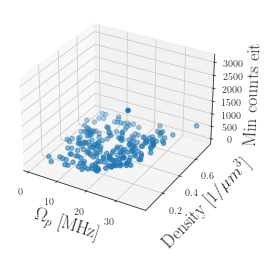

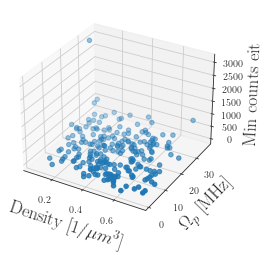

In [82]:
plt.rcParams.update({
  "text.usetex": True,

})

sns.set_style("white")



#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font',**{'family':'serif','serif':['Latin Modern Roman']})


plt.plot(a.z_grid,a.ground_state_density(),label=r'Ground State Density $[1/\mu m^3]$')
plt.plot(a.z_grid,a.impurity_density(),label='Impurity Number Density')
plt.legend()
plt.xlabel("Medium length $[\mu m]$", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.show()

plt.plot(a.z_grid,a.N_bl_6(),label='$N_{b,R6}$')
plt.plot(a.z_grid,a.N_bl_3(),label='$N_{b,R3}$')
plt.legend(fontsize=14)
plt.xlabel("Medium length $[\mu m]$", fontsize=18)
plt.ylabel("$N_b$", fontsize=18)
plt.show()

plt.plot(a.z_grid,a.f_bl(),label='$f_{bl,int}$')
plt.plot(a.z_grid,a.f_bl_simple(),label='$f_{bl,hardsphere}$')
plt.plot(a.z_grid,a.f_ir(),label=r'$f_{ir,hardsphere}$')
plt.legend(fontsize=14)
plt.xlabel("Medium length $[\mu m]$", fontsize=18)
plt.show()

plt.plot(a.z_grid,a.integrand())
plt.ylabel("$\Delta \chi$", fontsize=18)
plt.xlabel("Medium length $[\mu m]$", fontsize=18)
plt.show()


print("Alpha: " ,a.alpha())
print("Minimum Counts with Impurity: ", a.min_counts_i())
print("Minimum Counts with EIT: ", a.min_counts_e())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list,a.n_0_list,a.min_counts_i_list,cmap='afmhot')

ax.set_xlabel('$\Omega_p$ [MHz]', fontsize=18)
ax.set_ylabel('Density $[1/\mu m^3]$', fontsize=18)
ax.set_zlabel('$Min_{counts impurity}$', fontsize=18)

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.min_counts_i_list,cmap='afmhot')


ax.set_xlabel('Density $[1/\mu m^3]$', fontsize=18)
ax.set_ylabel('$\Omega_p$ [MHz]', fontsize=18)
ax.set_zlabel('Min counts impurity', fontsize=18)

plt.show()



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list,a.n_0_list,a.min_counts_e_list,cmap='afmhot')


ax.set_xlabel('$\Omega_p$ [MHz]', fontsize=18)
ax.set_ylabel('Density $[1/\mu m^3]$', fontsize=18)
ax.set_zlabel('Min counts eit', fontsize=18)

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.min_counts_e_list,cmap='afmhot')


ax.set_xlabel('Density $[1/\mu m^3]$', fontsize=18)
ax.set_ylabel('$\Omega_p$ [MHz]', fontsize=18)
ax.set_zlabel('Min counts eit', fontsize=18)

plt.show()

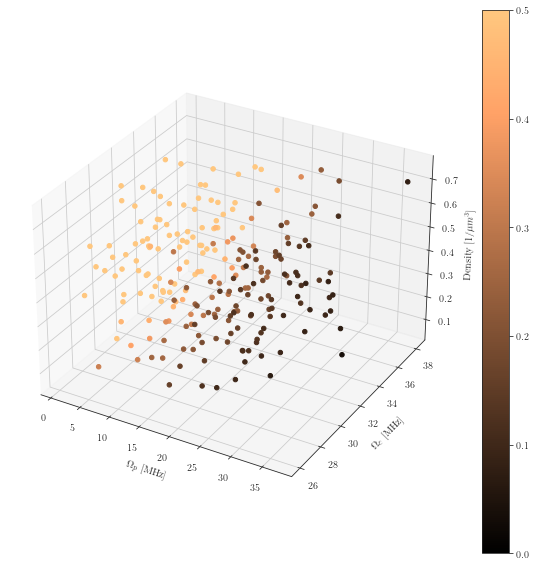

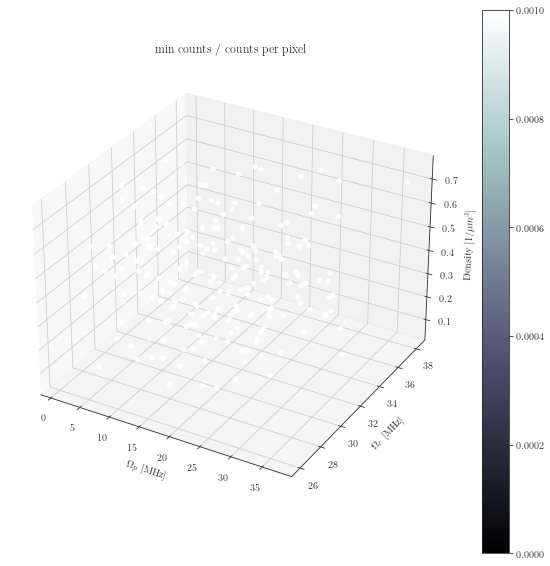

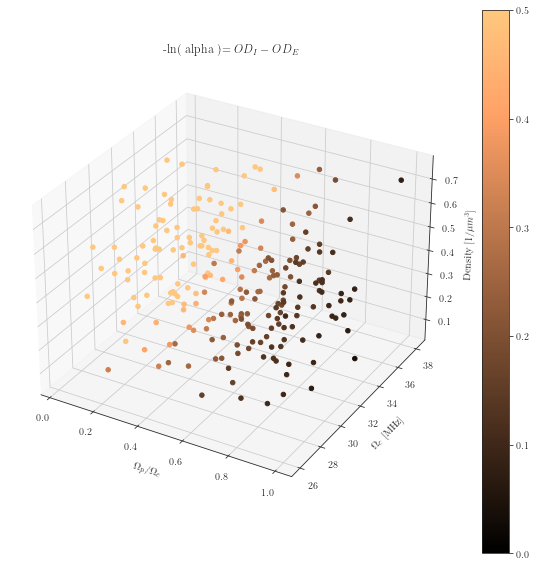

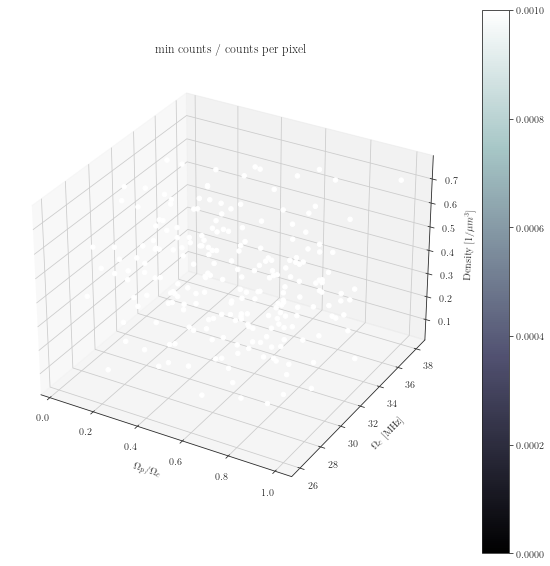

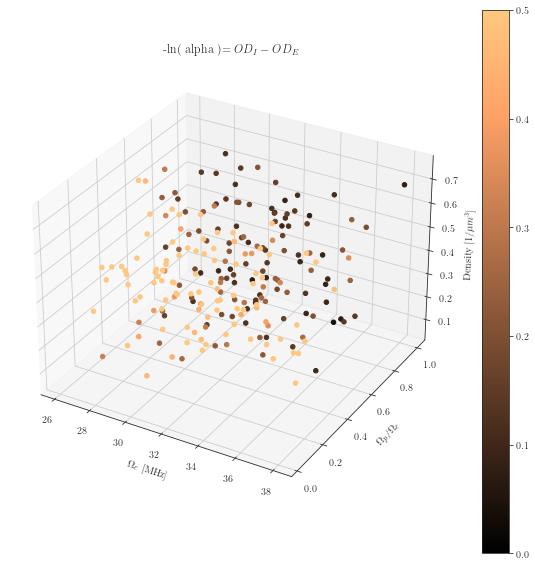

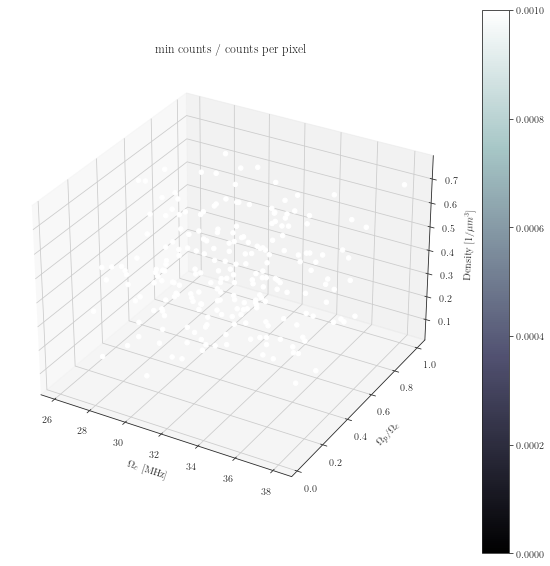

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_xlabel('$\Omega_p$ [MHz]')
ax.set_ylabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
#ax.set_title(r'$- \ln ( \Alpha )=OD_I - OD_E $')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_xlabel('$\Omega_p$ [MHz]')
ax.set_ylabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
ax.set_title('min counts / counts per pixel')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
y = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_xlabel('$\Omega_p / \Omega_c$')
ax.set_ylabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
ax.set_title('-ln( alpha )$=OD_I-OD_E$')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
y = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_xlabel('$\Omega_p/\Omega_c$')
ax.set_ylabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
ax.set_title('min counts / counts per pixel')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
x = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_ylabel('$\Omega_p/\Omega_c$')
ax.set_xlabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
ax.set_title('-ln( alpha )$=OD_I - OD_E$')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
x = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_ylabel('$\Omega_p/\Omega_c$')
ax.set_xlabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
ax.set_title('min counts / counts per pixel')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

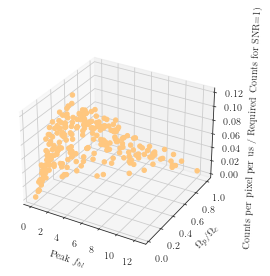

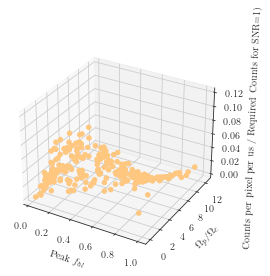

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c=a.min_counts_over_n_counts
ax.scatter(a.peak_f_bl_list,a.Omega_p_over_c_list, a.min_counts_over_n_counts, c=c, cmap=plt.copper(),vmin=0,vmax=0.001,depthshade=False)


ax.set_xlabel('Peak $f_{bl}$')
ax.set_ylabel('$\Omega_p/\Omega_c$')
ax.set_zlabel('Counts per pixel per us / Required Counts for SNR=1)')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_over_c_list,a.peak_f_bl_list, a.min_counts_over_n_counts, c=c, cmap=plt.copper(),vmin=0,vmax=0.001,depthshade=False)


ax.set_xlabel('Peak $f_{bl}$')
ax.set_ylabel('$\Omega_p/\Omega_c$')
ax.set_zlabel('Counts per pixel per us / Required Counts for SNR=1)')


plt.show()

import plotly.io as pio
pio.renderers.default = "browser"
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(
    x=a.Omega_p_over_c_list,
    y=a.peak_f_bl_list,
    z=a.min_counts_over_n_counts,
    mode='markers',
    marker=dict(
        size=2,
        color=a.min_counts_over_n_counts,                # set color to an array/list of desired values
        colorscale='Cividis',   # choose a colorscale
        opacity=0.6
    )
)])

fig.update_layout(
    title=go.layout.Title(
        text="Peak f_bl (y) vs Omega_p/Omega_c (x)",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="x Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="y Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)


# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


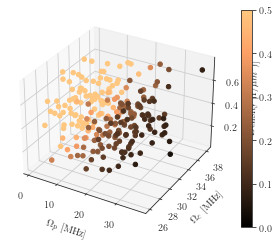

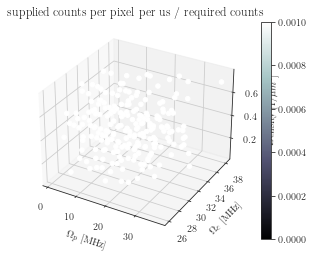

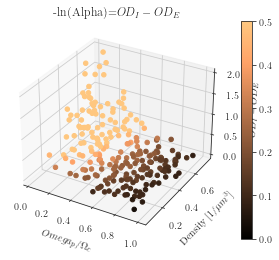

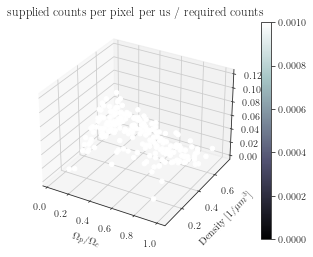

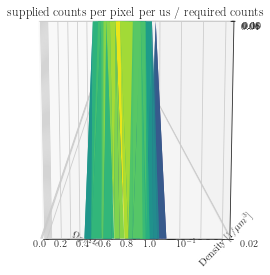

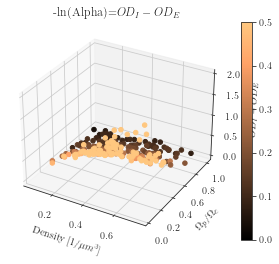

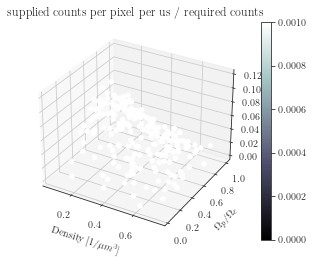

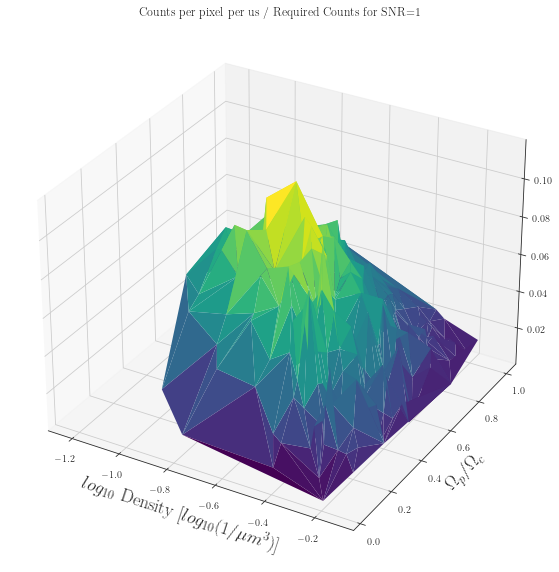

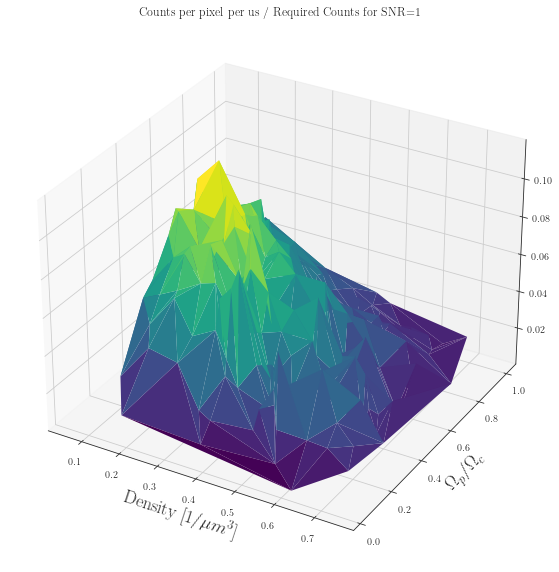

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_xlabel('$\Omega_p$ [MHz]')
ax.set_ylabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3)]$')
#ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_xlabel('$\Omega_p$ [MHz]')
ax.set_ylabel('$\Omega_c$ [MHz]')
ax.set_zlabel('Density $[1/\mu m^3]$')
ax.set_title('supplied counts per pixel per us / required counts')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
c = a.Omega_c_list
y = a.n_0_list
c = a.alpha_list
z = a.alpha_list

ax.set_xlabel('$Omega_p/\Omega_c$')
ax.set_ylabel('Density $[1/\mu m^3]$')
ax.set_zlabel('$OD_I-OD_E$')
ax.set_title('-ln(Alpha)=$OD_I-OD_E$')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
c = a.Omega_c_list
y = a.n_0_list
c = a.min_counts_over_n_counts
z = a.min_counts_over_n_counts

ax.set_xlabel('$\Omega_p/\Omega_c$')
ax.set_ylabel('Density $[1/\mu m^3]$')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied counts per pixel per us / required counts')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')
ax.set_yscale('log')
ax.set_ylabel('Density $[1/\mu m^3]$')
ax.set_xlabel('$\Omega_p/\Omega_c$')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied counts per pixel per us / required counts')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
c = a.Omega_c_list
x = a.n_0_list
c = a.alpha_list
z = a.alpha_list

ax.set_ylabel('$\Omega_p/\Omega_c$')
ax.set_xlabel('Density $[1/\mu m^3]$')
ax.set_zlabel('$OD_I-OD_E$')
ax.set_title('-ln(Alpha)=$OD_I-OD_E$')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
c = a.Omega_c_list
x = a.n_0_list
c = a.min_counts_over_n_counts
z = a.min_counts_over_n_counts

ax.set_ylabel('$\Omega_p/\Omega_c$')
ax.set_xlabel('Density $[1/\mu m^3]$')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied counts per pixel per us / required counts')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
#ax.plot(x, z, 'r+', zdir='y', zs=1.1)
#ax.plot(y, z, 'g+', zdir='x', zs=0)
#ax.plot(x, y, 'k+', zdir='z', zs=-1)
fig.colorbar(img)


plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.plot_trisurf(np.log10(x), y, z,
                cmap='viridis', edgecolor='none')
ax.set_ylabel('$\Omega_p/\Omega_c$', fontsize=18)
ax.set_xlabel('$log_{10}$ Density $[log_{10}(1/\mu m^3)]$', fontsize=18)
ax.set_title('Counts per pixel per us / Required Counts for SNR=1')
#ax.set_title('supplied_counts_per_pixel_per_us / required_counts')
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')
ax.set_ylabel('$\Omega_p/\Omega_c$', fontsize=18)
ax.set_xlabel('Density $[1/\mu m^3]$', fontsize=18)
ax.set_title('Counts per pixel per us / Required Counts for SNR=1')
#ax.set_title('supplied_counts_per_pixel_per_us / required_counts')
plt.show()


In [81]:
import plotly.io as pio
pio.renderers.default = "browser"
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=z,                # set color to an array/list of desired values
        colorscale='Cividis',   # choose a colorscale
        opacity=0.6
    )
)])

fig.update_layout(
    title=go.layout.Title(
        text="Density (x) vs Omega_p/Omega_c (y)",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Density",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="y Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)


# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


